In [5]:
import numpy as np #importing the numpy module which will be used in this project
import pandas as pd#importing the pandas module which will be used in this project
import matplotlib.pyplot as plt#importing the matplotlib module which will be used in this project
import seaborn as sns#importing the seaborn module which will be used in this project
from sklearn.model_selection import train_test_split#importing the sklearn module which will be used in this project

In [6]:
dataframe = pd.read_csv('dataset.csv')#reading our dataset using read_csv function
dataframe.head() #printing the first 5 columns of our dataset using head function

,Unnamed: 0,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1073,1.0,48.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,181.0,153.0,93.0,29.34,103.0,88.0,0.0
1,953,0.0,39.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,170.0,137.5,77.5,27.35,67.0,70.0,0.0
2,2584,0.0,43.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,256.0,129.0,86.0,25.89,96.0,72.0,0.0
3,3068,0.0,46.0,3.0,1.0,30.0,0.0,0.0,0.0,0.0,196.0,114.0,75.0,21.01,60.0,69.0,0.0
4,1826,0.0,38.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,167.0,102.5,60.0,22.58,60.0,57.0,0.0


In [7]:
dataframe.drop('education', axis=1, inplace=True)#dropping unnecessary column education becuase this column won't impact the chances of a person having a heart attack

In [8]:
dataframe.rename(columns={"TenYearCHD": "CHD"}, inplace=True) #changing the column name of TenYearCHD

In [9]:
dataframe.head()#printing the dataset again using head funciton

,Unnamed: 0,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD
0,1073,1.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,181.0,153.0,93.0,29.34,103.0,88.0,0.0
1,953,0.0,39.0,1.0,5.0,0.0,0.0,0.0,0.0,170.0,137.5,77.5,27.35,67.0,70.0,0.0
2,2584,0.0,43.0,1.0,1.0,0.0,0.0,0.0,0.0,256.0,129.0,86.0,25.89,96.0,72.0,0.0
3,3068,0.0,46.0,1.0,30.0,0.0,0.0,0.0,0.0,196.0,114.0,75.0,21.01,60.0,69.0,0.0
4,1826,0.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,167.0,102.5,60.0,22.58,60.0,57.0,0.0


In [10]:
x = dataframe.iloc[:,:-1]
y = dataframe.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

<AxesSubplot:xlabel='male', ylabel='count'>

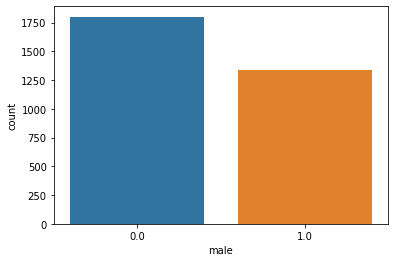

In [11]:
sns.countplot(x=train_data['male']) ##plotting a count plot of male using sns.countplot

<AxesSubplot:xlabel='male', ylabel='count'>

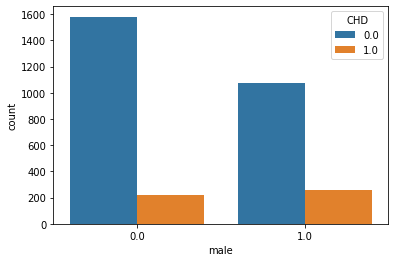

In [12]:
sns.countplot(x=train_data['male'], hue=train_data['CHD']) ##plotting a count plot of CHD and male having disease or not using sns.countplot

<AxesSubplot:>

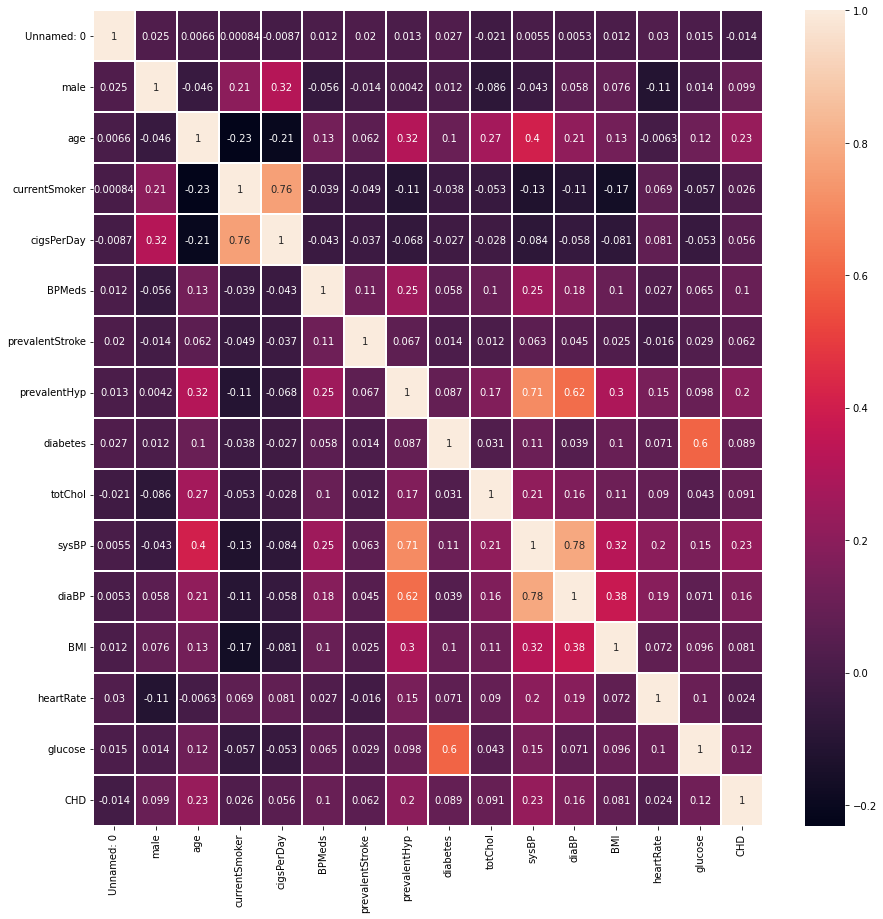

In [13]:
plt.figure(figsize=(15,15))#plotting a figure of size 15 and 15
sns.heatmap(train_data.corr(), annot=True, linewidths=0.1) #plotting a heatmat of dataframe correlation

In [14]:
train_data.drop(['currentSmoker', 'diaBP'], axis=1, inplace=True)#dropping the column becuase they are correlated very high

In [16]:
train_data = train_data[~(train_data['sysBP'] > 220)] #deleting the outliers values in sysBP of training data
train_data = train_data[~(train_data['BMI'] > 43)]#deleting the outliers values in BMI of training data
train_data = train_data[~(train_data['heartRate'] > 125)]#deleting the outliers values in heartRate of training data
train_data = train_data[~(train_data['glucose'] > 200)]#deleting the outliers values in glucose of training data
train_data = train_data[~(train_data['totChol'] > 450)]#deleting the outliers values in totChol of training data

(3092, 14)


In [17]:
from sklearn.preprocessing import StandardScaler #importing the standard scaler library
scaler = StandardScaler()
train_data[cols_to_standardise] = scaler.fit_transform(train_data[['age','totChol','sysBP','BMI', 'heartRate', 'glucose', 'cigsPerDay']])#taking all the columns which are to be standardise in an array

In [18]:
test_data.drop(['currentSmoker', 'diaBP'], axis=1, inplace=True)

imputer = SimpleImputer(strategy='most_frequent')#Creating an instance of simple Imputer which will be used to fill the null vlaues
test_data = pd.DataFrame(imputer.fit_transform(test_data))#fitting the data and filling any null values in the test dataset


In [19]:
test_data[cols_to_standardise] = scaler.fit_transform(test_data[['age','totChol','sysBP','BMI', 'heartRate', 'glucose', 'cigsPerDay']])#taking all the columns which are to be standardise in an array

In [20]:
from sklearn.tree import LogisticRegression #importing the descision tree classifier from the sklearn tree 
tree = LogisticRegression() #making an instance the descision tree with maxdepth = 3 as passing the input
clf = tree.fit(X_train,y_train) #here we are passing our training and the testing data to the tree and fitting it
y_pred = clf.predict(X_test) #predicting the value by passing the x_test datset to the tree 
accuracy_score(y_pred,y_test)# here we are printing the accuracy score of the prediction and the testing data

Accuracy Score for logistic regression is 86.888454


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
from sklearn.tree import DecisionTreeClassifier #importing the descision tree classifier from the sklearn tree 
tree = DecisionTreeClassifier(max_depth=3) #making an instance the descision tree with maxdepth = 3 as passing the input
clf = tree.fit(X_train,y_train) #here we are passing our training and the testing data to the tree and fitting it
y_pred = clf.predict(X_test) #predicting the value by passing the x_test datset to the tree 
accuracy_score(y_pred,y_test)# here we are printing the accuracy score of the prediction and the testing data

Accuracy score for Decision tree is 79.843444


In [24]:
from sklearn.neighbors import RandomForestClassifier #importing the k nearest classifier from the sklearn neighbors 
neigh = RandomForestClassifier(n_estimator=3) #making an instance the k nearest neighbors with neighbors = 3 as passing the input
knnclf = neigh.fit(X_train,y_train) #here we are passing our training and the testing data to the tree and fitting it
y_pred = knnclf.predict(X_test) #predicting the value by passing the x_test datset to the tree 
accuracy_score(y_pred,y_test)# here we are printing the accuracy score of the prediction and the testing data

Accuracy score for Random Forest is 86.105675
